In [1]:
import pandas as pd
import missingno

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Loading data

In [2]:
df = pd.read_csv('stack_overflow_tags.csv')
df

,tag,total_posts,total_views,total_answers,total_comments,total_favorites,year
0,python,299375,90079323,348131,590876,30885.0,2020
1,javascript,263982,451873786,391643,630988,87591.0,2016
2,javascript,255483,472718142,387566,598602,95078.0,2015
3,javascript,249896,365146121,359271,618928,67271.0,2017
4,javascript,235506,539036428,374997,534326,101135.0,2014
...,...,...,...,...,...,...,...
13097,swiftui,1,2079,2,0,2.0,2012
13098,visual-studio-2017,1,100536,6,0,9.0,2010
13099,powerbi,1,12310,4,1,3.0,2012
13100,google-cloud-firestore,1,74884,12,9,47.0,2016


## 2. EDA

### 2.1 Explaining Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13102 entries, 0 to 13101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tag              13088 non-null  object 
 1   total_posts      13102 non-null  int64  
 2   total_views      13102 non-null  int64  
 3   total_answers    13102 non-null  int64  
 4   total_comments   13102 non-null  int64  
 5   total_favorites  13032 non-null  float64
 6   year             13102 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 716.6+ KB


In [4]:
df.describe(include='all')

,tag,total_posts,total_views,total_answers,total_comments,total_favorites,year
count,13088,13102.000000,1.310200e+04,13102.000000,13102.000000,13032.000000,13102.000000
unique,999,NaN,NaN,NaN,NaN,NaN,NaN
top,python,NaN,NaN,NaN,NaN,NaN,NaN
freq,14,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3637.309342,9.894118e+06,5493.166692,7611.276294,2309.116559,2014.799878
std,NaN,13268.367785,3.924597e+07,20515.727092,30940.827789,8307.547023,3.942562
min,NaN,1.000000,1.700000e+01,0.000000,0.000000,0.000000,2008.000000
25%,NaN,552.000000,6.393742e+05,781.000000,778.000000,189.000000,2011.000000
50%,NaN,1133.000000,2.504830e+06,1652.500000,2050.500000,612.000000,2015.000000
75%,NaN,2435.000000,6.870135e+06,3566.750000,4670.750000,1700.000000,2018.000000


<AxesSubplot:>

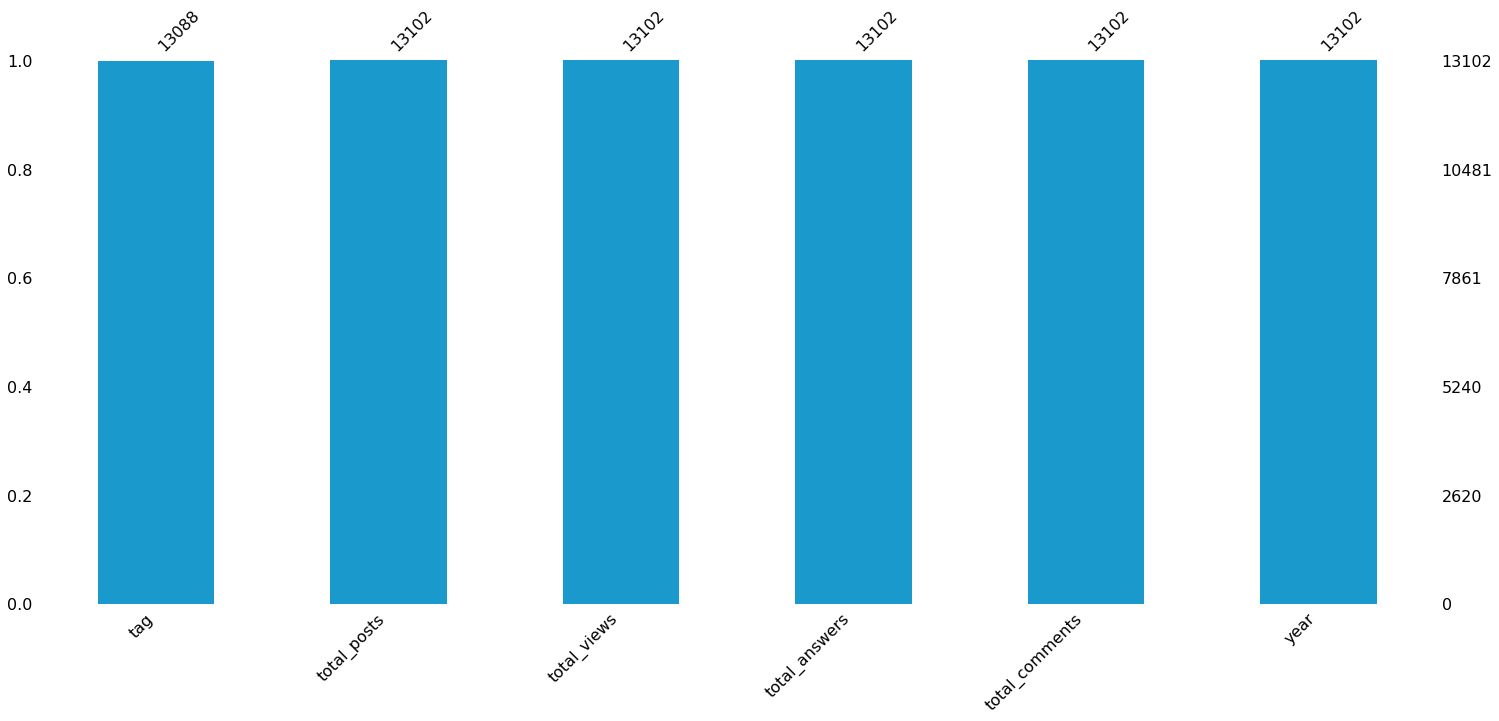

In [5]:
# check missing value using missingno
# missing value excluding total_favorites
missingno.bar(df=df.iloc[:, [0, 1, 2, 3, 4, 6]], color=(0.1, 0.6, 0.8))

# checked missing values in total_favorites, tag column

### 2.2 tag

In [6]:
# check tag label
tag_count_dict = df['tag'].value_counts().to_dict()
tag_list = [tag for tag in tag_count_dict.keys()]
len(tag_list)

999

In [7]:
# check NaN tag value
df[df['tag'].isnull()]

# filling NaN to no_tag
df['tag'].fillna('no_tag', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13102 entries, 0 to 13101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tag              13102 non-null  object 
 1   total_posts      13102 non-null  int64  
 2   total_views      13102 non-null  int64  
 3   total_answers    13102 non-null  int64  
 4   total_comments   13102 non-null  int64  
 5   total_favorites  13032 non-null  float64
 6   year             13102 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 716.6+ KB


In [8]:
df[df['tag'] == 'no_tag']

,tag,total_posts,total_views,total_answers,total_comments,total_favorites,year
4274,no_tag,1862,13536522,3997,4874,1827.0,2013
4639,no_tag,1707,6721378,3052,4703,871.0,2014
5072,no_tag,1536,4186511,2717,4209,540.0,2015
5637,no_tag,1358,10084708,3290,2986,1391.0,2012
5736,no_tag,1331,3009583,2208,4102,488.0,2016
6342,no_tag,1172,2156866,1859,3270,364.0,2017
6807,no_tag,1078,20139550,3338,2112,4335.0,2011
6911,no_tag,1057,263487,1331,2698,90.0,2020
6976,no_tag,1045,1185986,1550,3204,213.0,2018
8202,no_tag,832,504135,1224,2334,132.0,2019


### 2.3 total_posts

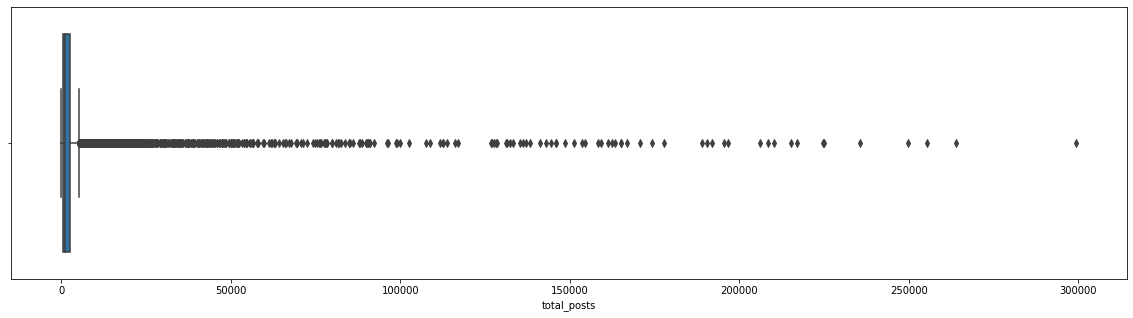

In [9]:
plt.figure(figsize=(20, 5))

sns.boxplot(x='total_posts', data=df)
plt.show()

### 2.4 total_views

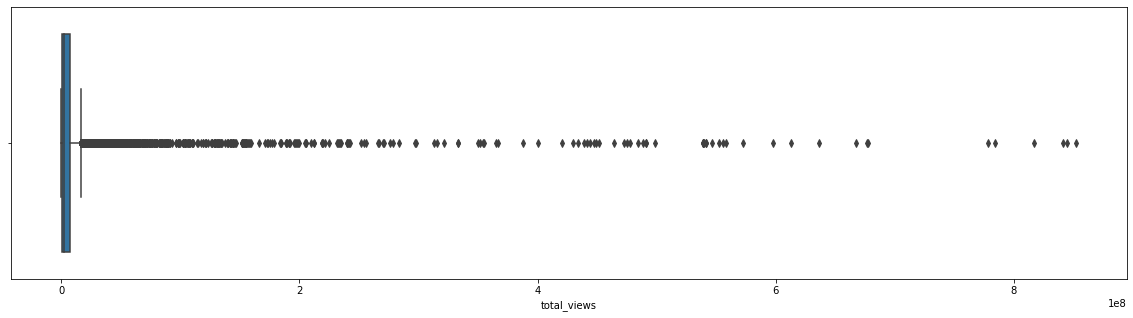

In [10]:
plt.figure(figsize=(20, 5))

sns.boxplot(x='total_views', data=df)
plt.show()

### 2.5 total_answers

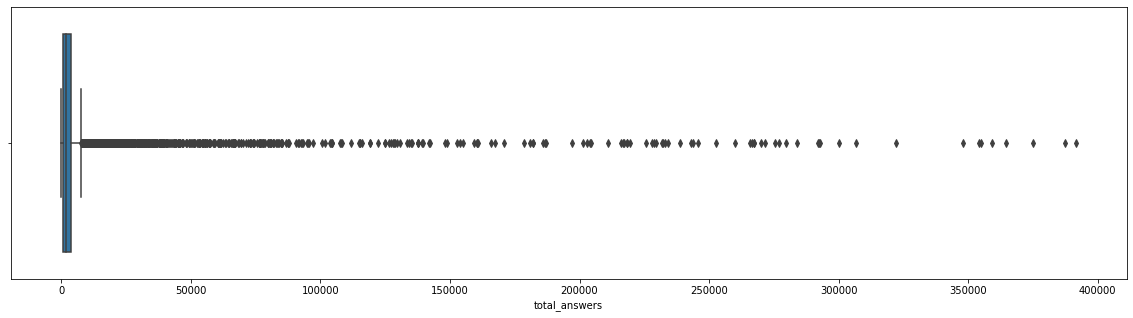

In [11]:
plt.figure(figsize=(20, 5))

sns.boxplot(x='total_answers', data=df)
plt.show()

### 2.6 total_comments

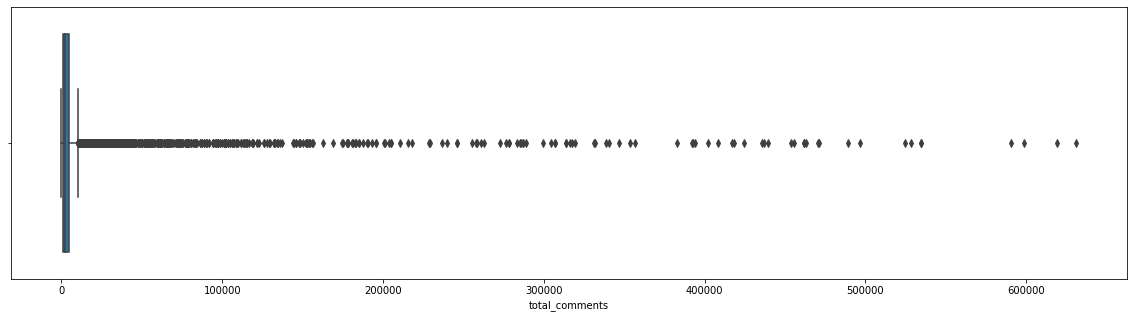

In [12]:
plt.figure(figsize=(20, 5))

sns.boxplot(x='total_comments', data=df)
plt.show()

### 2.7 year

In [13]:
# check tag count by year
groupby_year_tag_count = df.groupby('year').count()['tag']
groupby_year_tag_count

year
2008    731
2009    805
2010    856
2011    899
2012    932
2013    954
2014    972
2015    983
2016    996
2017    997
2018    997
2019    996
2020    992
2021    992
Name: tag, dtype: int64

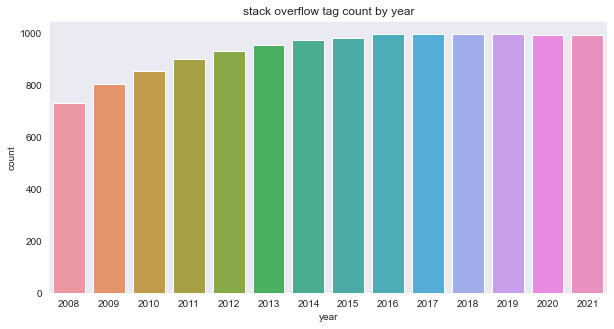

In [14]:
# tag count graph group by year
fig = plt.figure(figsize=(10, 5))
sns.set_style('dark')

tag_count_by_year_df = pd.DataFrame(groupby_year_tag_count).reset_index()
ax = sns.barplot(data=tag_count_by_year_df, x='year', y='tag')

ax.set_title('stack overflow tag count by year')
ax.set_xlabel('year')
ax.set_ylabel('count')

plt.show()

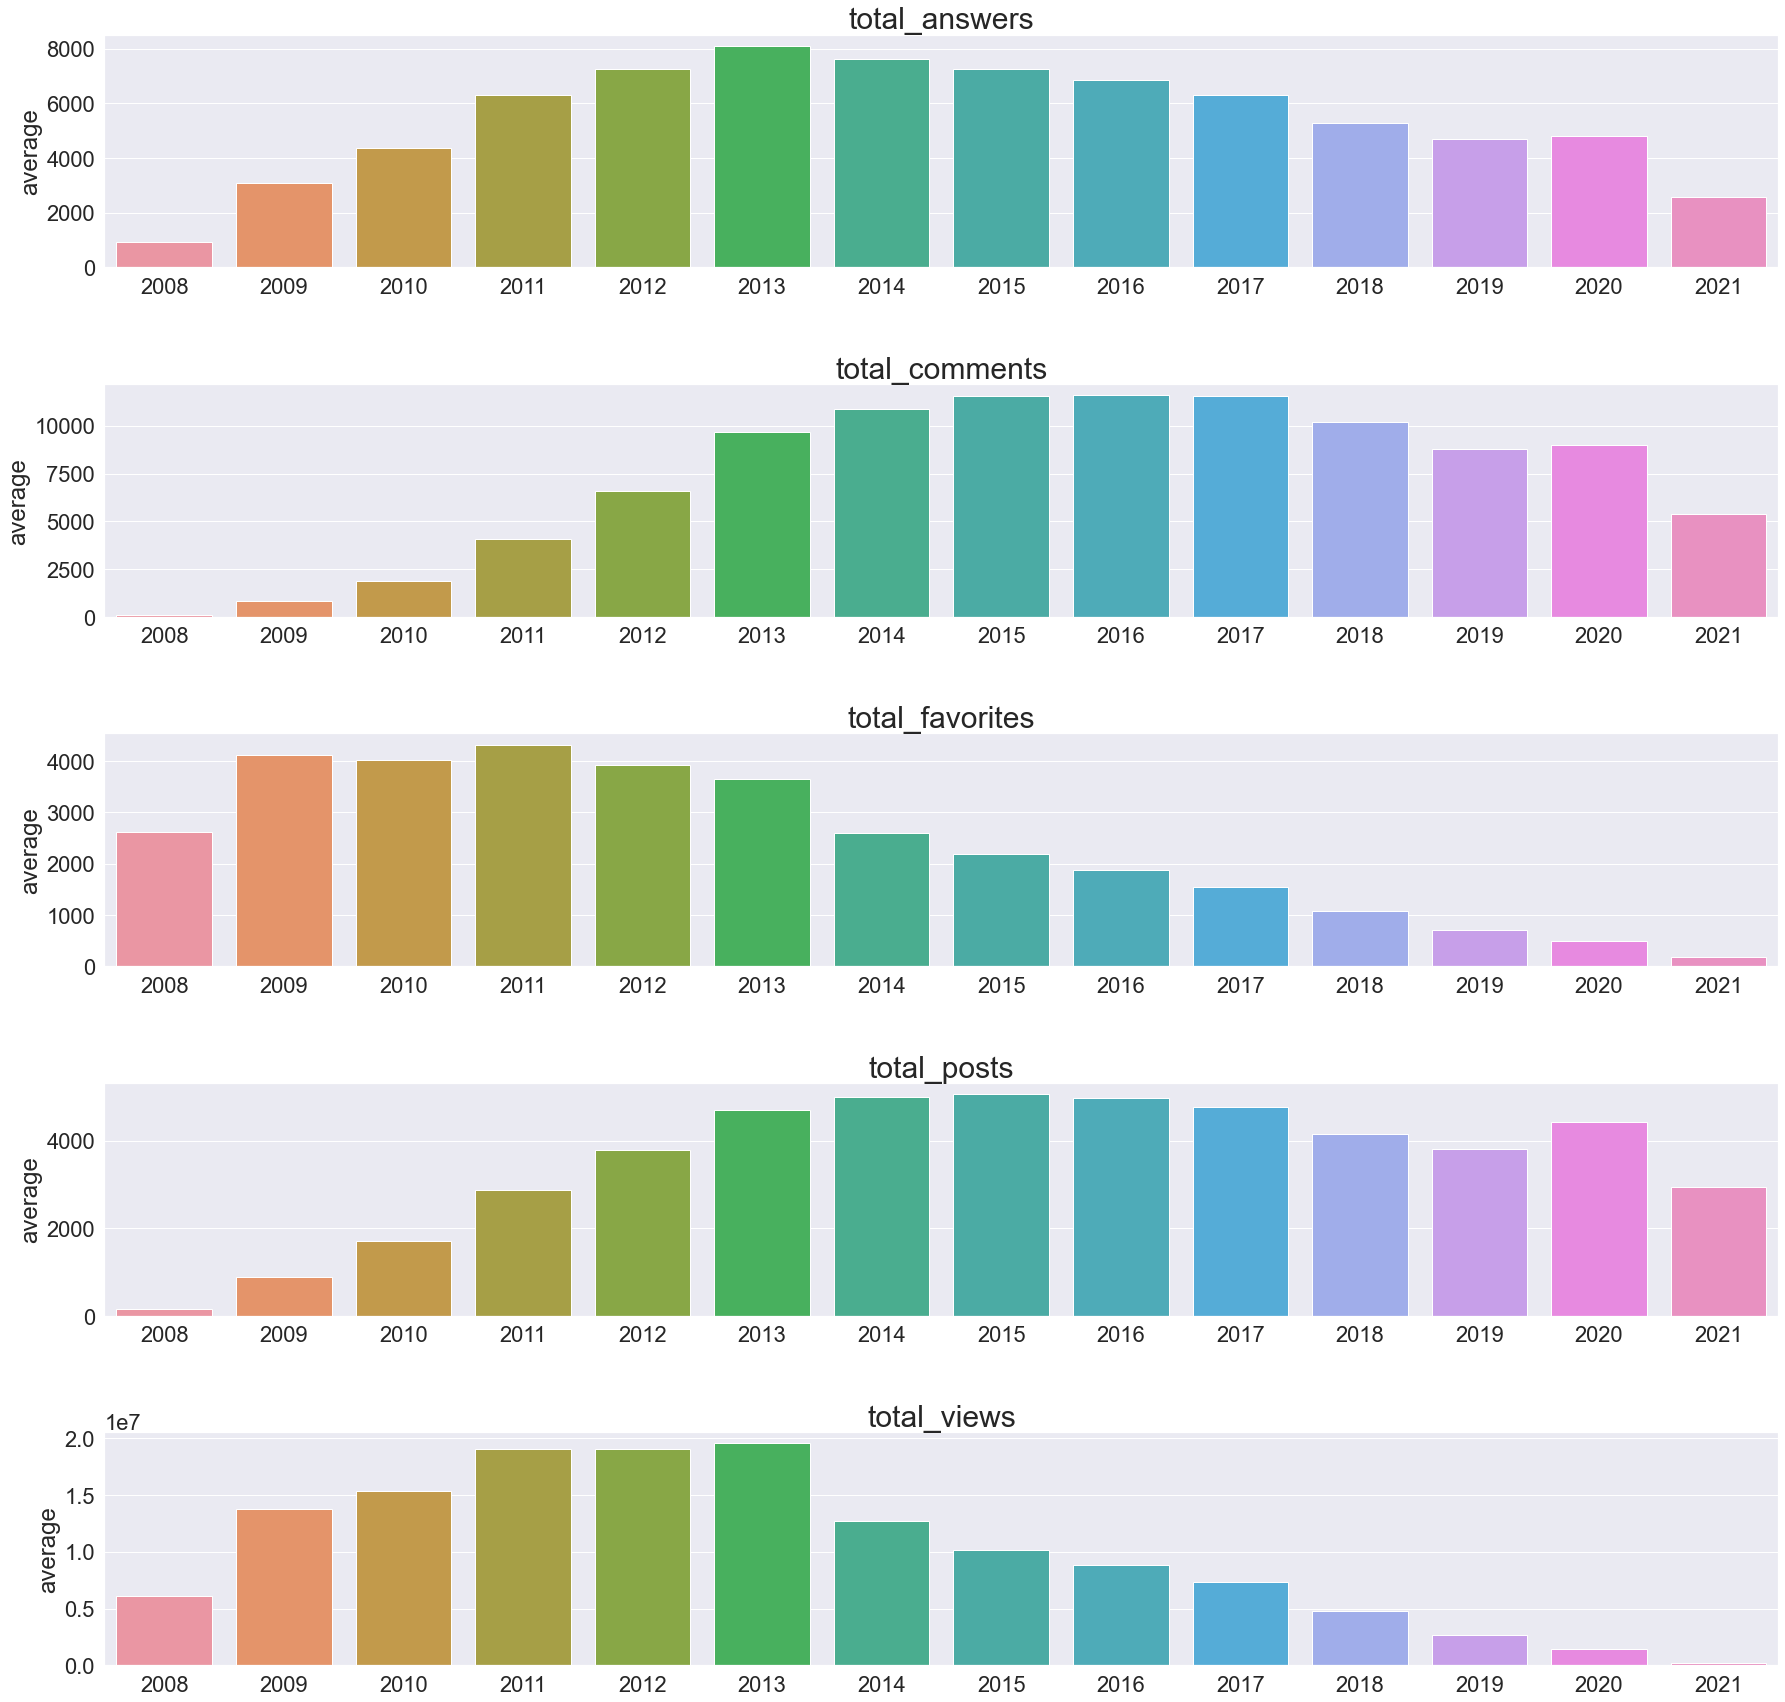

In [15]:
# total_posts, views, answers, comments, favorites average graph group by year
fig = plt.figure(figsize=(30, 30))
plt.subplots_adjust(hspace=0.5)

sns.set_style('dark')
sns.set(font_scale=2)

num_df = df[df.columns.difference(['tag'])]
num_df_groupby_year = num_df.groupby('year').mean()

for index, col in enumerate(num_df_groupby_year.columns):
    area = fig.add_subplot(len(num_df_groupby_year.columns), 1, index+1)
    ax = sns.barplot(data=num_df_groupby_year, x=num_df_groupby_year.index, y=col, ax=area)

    ax.set_title(col, fontsize=30)
    ax.set_xlabel('')
    ax.set_ylabel('average')

plt.show()

### 2.8 total_favorites(target data)

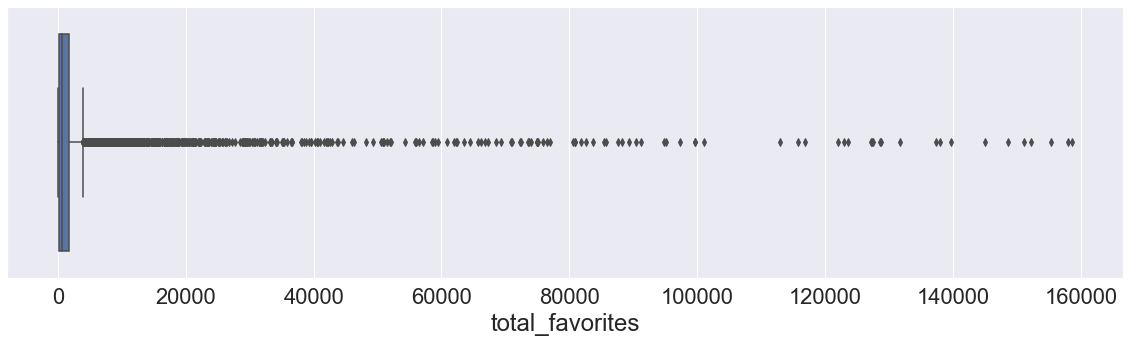

In [16]:
plt.figure(figsize=(20, 5))

sns.boxplot(x='total_favorites', data=df)
plt.show()

In [17]:
# check NaN values
df[df['total_favorites'].isnull()]

# fill NaN to average value of total_favorites
df['total_favorites'].fillna('average', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13102 entries, 0 to 13101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tag              13102 non-null  object
 1   total_posts      13102 non-null  int64 
 2   total_views      13102 non-null  int64 
 3   total_answers    13102 non-null  int64 
 4   total_comments   13102 non-null  int64 
 5   total_favorites  13102 non-null  object
 6   year             13102 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 716.6+ KB


### 2.9 Preprocessing data for training

In [18]:
df.head()

,tag,total_posts,total_views,total_answers,total_comments,total_favorites,year
0,python,299375,90079323,348131,590876,30885.0,2020
1,javascript,263982,451873786,391643,630988,87591.0,2016
2,javascript,255483,472718142,387566,598602,95078.0,2015
3,javascript,249896,365146121,359271,618928,67271.0,2017
4,javascript,235506,539036428,374997,534326,101135.0,2014


In [19]:
# change tag data into labeled feature value
# not using one-hot encode cause for data size
# I'll gonna just label tag data into tag value count in this step...
tag_count_series = df['tag'].value_counts()
df['tag'] = df['tag'].map(tag_count_series)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13102 entries, 0 to 13101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tag              13102 non-null  int64 
 1   total_posts      13102 non-null  int64 
 2   total_views      13102 non-null  int64 
 3   total_answers    13102 non-null  int64 
 4   total_comments   13102 non-null  int64 
 5   total_favorites  13102 non-null  object
 6   year             13102 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 716.6+ KB


In [20]:
# check total_favorites value count
df['total_favorites'].value_counts()

# change avearge into average number
average = df[df['total_favorites'] != 'average'].mean()['total_favorites']
df.loc[df['total_favorites'] == 'average', 'total_favorites'] = average

# change data type into int64
df = df.astype({'total_favorites':'int64'})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13102 entries, 0 to 13101
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tag              13102 non-null  int64
 1   total_posts      13102 non-null  int64
 2   total_views      13102 non-null  int64
 3   total_answers    13102 non-null  int64
 4   total_comments   13102 non-null  int64
 5   total_favorites  13102 non-null  int64
 6   year             13102 non-null  int64
dtypes: int64(7)
memory usage: 716.6 KB


In [21]:
# drop year column
# add total post, views, answers, comments average value by year

for col_name in df.iloc[:, 1:5].columns:
    num_df_groupby_col_year = num_df_groupby_year[col_name]
    df[f'{col_name}_by_year_mean'] = df['year'].map(num_df_groupby_col_year)

df = df.drop('year', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13102 entries, 0 to 13101
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tag                          13102 non-null  int64  
 1   total_posts                  13102 non-null  int64  
 2   total_views                  13102 non-null  int64  
 3   total_answers                13102 non-null  int64  
 4   total_comments               13102 non-null  int64  
 5   total_favorites              13102 non-null  int64  
 6   total_posts_by_year_mean     13102 non-null  float64
 7   total_views_by_year_mean     13102 non-null  float64
 8   total_answers_by_year_mean   13102 non-null  float64
 9   total_comments_by_year_mean  13102 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1023.7 KB


In [22]:
df.head()

,tag,total_posts,total_views,total_answers,total_comments,total_favorites,total_posts_by_year_mean,total_views_by_year_mean,total_answers_by_year_mean,total_comments_by_year_mean
0,14,299375,90079323,348131,590876,30885,4413.517137,1.399201e+06,4799.078629,9009.379032
1,14,263982,451873786,391643,630988,87591,4973.842369,8.835620e+06,6851.477912,11607.434739
2,14,255483,472718142,387566,598602,95078,5062.679552,1.011505e+07,7250.973550,11562.552391
3,14,249896,365146121,359271,618928,67271,4774.440321,7.299537e+06,6316.466399,11573.195587
4,14,235506,539036428,374997,534326,101135,5000.050412,1.270100e+07,7616.601852,10882.439300


In [23]:
# adjust minmax scaling to the all dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# drop target data column
scaled_df = scaled_df.drop('total_favorites', axis=1)
scaled_df.head()

,tag,total_posts,total_views,total_answers,total_comments,total_posts_by_year_mean,total_views_by_year_mean,total_answers_by_year_mean,total_comments_by_year_mean
0,1.0,1.000000,0.105674,0.888899,0.936430,0.867444,0.060118,0.539389,0.773773
1,1.0,0.881777,0.530103,1.000000,1.000000,0.981860,0.445311,0.824430,1.000000
2,1.0,0.853387,0.554556,0.989590,0.948674,1.000000,0.511583,0.879913,0.996092
3,1.0,0.834725,0.428361,0.917343,0.980887,0.941143,0.365745,0.750127,0.997019
4,1.0,0.786658,0.632355,0.957497,0.846808,0.987211,0.645531,0.930692,0.936871


In [24]:
scaled_df.to_csv('scaled_tags.csv', index=False)

## 3. Training Data

In [25]:
# refine the input, target data for training into model
data = scaled_df
target = df['total_favorites']

In [32]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3)

9705       32
6299     1895
3397      994
8886     1311
2839      334
         ... 
9664      110
1371      406
1766     1586
8077      191
10095     106
Name: total_favorites, Length: 3931, dtype: int64

### 3.1 Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(train_X, train_y)

pred = model.predict(test_X)
r2 = r2_score(pred, test_y)
r2

0.8940108234844939

In [59]:
intercept = model.intercept_
coef_list = model.coef_

print(coef_list)
print(intercept)

[ 6.94544570e+01  7.56220498e+04  1.76506910e+05 -2.79294971e+04
 -4.40009560e+04 -5.88422574e+03 -1.92143343e+03  4.37930642e+03
  1.08345896e+03]
1848.4550353062243


In [63]:
test_y

9705       32
6299     1895
3397      994
8886     1311
2839      334
         ... 
9664      110
1371      406
1766     1586
8077      191
10095     106
Name: total_favorites, Length: 3931, dtype: int64

In [64]:
pred

array([ 169.3714449 , 1021.27149954, 1172.46560403, ...,  609.47571831,
        155.93954287,  446.06146868])

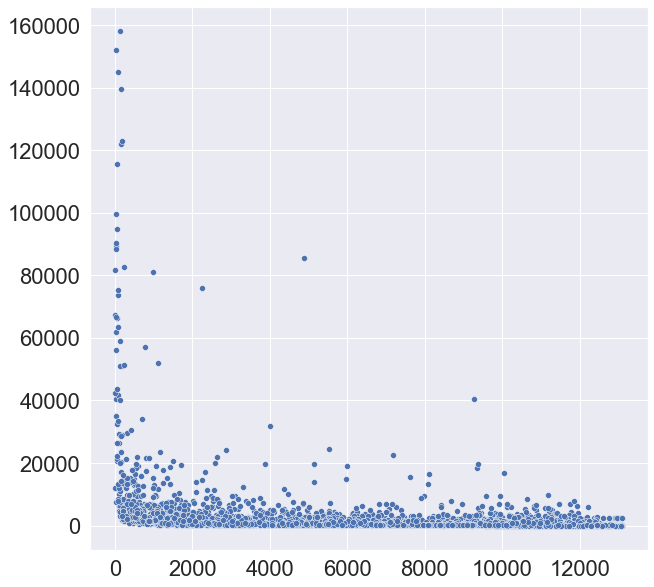

In [60]:
plt.figure(figsize=(10, 10))

sns.scatterplot(data=test_y, x=test_y.index, y=test_y.values)
plt.show()